# EDA Países Específicos

Usando dataset ../../Data/02ParaLimpiar/02desastres_paralimpiar.csv

## Objetivo

### Análisis de 5 países, uno por cada continente
Criterio de selección: value_count de país donde más desastres por continente

## Importar librerías

In [51]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 60)
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [8]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', encoding='utf-8', delimiter=';', engine='python')

# Verificar carga de dataset

##  Resumen básico shape, info

In [25]:
df.shape
# Resultado: 16636 filas y 20 columnas)

(16636, 20)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Seq                16636 non-null  int64  
 2   Disaster Subgroup  16636 non-null  object 
 3   Disaster Type      16636 non-null  object 
 4   Disaster Subtype   13313 non-null  object 
 5   Country            16636 non-null  object 
 6   ISO                16636 non-null  object 
 7   Region             16636 non-null  object 
 8   Continent          16636 non-null  object 
 9   Location           14825 non-null  object 
 10  Origin             4085 non-null   object 
 11  Dis Mag Value      5064 non-null   float64
 12  Dis Mag Scale      15416 non-null  object 
 13  Latitude           2775 non-null   object 
 14  Longitude          2775 non-null   object 
 15  Start Year         16636 non-null  int64  
 16  Start Month        162

## Columns

In [27]:
df.columns

Index(['Dis No', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude',
       'Start Year', 'Start Month', 'End Year', 'End Month', 'CPI'],
      dtype='object')

In [28]:
df['Disaster Type']

0                  Drought
1                  Drought
2               Earthquake
3        Volcanic activity
4        Volcanic activity
               ...        
16631                Flood
16632             Epidemic
16633                Storm
16634                Flood
16635             Epidemic
Name: Disaster Type, Length: 16636, dtype: object

# Groupby y filter

## Filtrar por países con el mayor número de desastres por continente

In [50]:
# Filtrar por países con los valores de recuento de desastres para cada continente
continent_countries = df.groupby('Continent')['Country'].value_counts().groupby('Continent')
continent_countries.head(20)

Continent  Country                               
Africa     Congo (the Democratic Republic of the)    148
           Nigeria                                   141
           Ethiopia                                  126
           Kenya                                     124
           Mozambique                                124
                                                    ... 
Oceania    American Samoa                              6
           Kiribati                                    6
           Niue                                        6
           Tokelau                                     6
           Northern Mariana Islands (the)              5
Name: Country, Length: 100, dtype: int64

In [52]:
# Filtrar por países con el mayor valor de recuento de desastres para cada continente
top_country_in_continent = df.groupby('Continent')['Country'].value_counts().groupby('Continent').idxmax()

if top_country_in_continent.isnull().any():
    top_country_in_continent = top_country_in_continent.dropna()
    if top_country_in_continent.empty:
        print("No hay datos disponibles para uno o más continentes.")
    else:
        top_country_in_continent = pd.Series(top_country_in_continent.values)
        print(top_country_in_continent)
        filter_countries_in_continent = df[df['Country'].isin(top_country_in_continent)]
else:
    top_country_in_continent = pd.Series(top_country_in_continent.values)
    print(top_country_in_continent.shape)
    filter_top_country_in_continent = df[df['Country'].isin(top_country_in_continent)]

top_country_in_continent

(5,)


0    (Africa, Congo (the Democratic Republic of the))
1          (Americas, United States of America (the))
2                                       (Asia, China)
3                                    (Europe, France)
4                                (Oceania, Australia)
dtype: object

Insights:
El país con más desastres por cada continente:
* República Democrática del Congo en África
* United States of America en América
* China en Asia
* Francia en Europa
* Australia en Oceanía

In [76]:
# Agrupar Subtipos de Desastres por Continente y País
continent_countries_subtypes = df.groupby(['Continent', 'Country'])['Disaster Subtype'].value_counts().reset_index(name='Count').sort()
continent_countries_subtypes

,Continent,Country,Disaster Subtype,Count
0,Africa,Algeria,Ground movement,21
1,Africa,Algeria,Riverine flood,20
2,Africa,Algeria,Flash flood,8
3,Africa,Algeria,Forest fire,3
4,Africa,Algeria,Bacterial disease,2
...,...,...,...,...
1712,Oceania,Vanuatu,Viral disease,2
1713,Oceania,Vanuatu,Landslide,1
1714,Oceania,Vanuatu,Tsunami,1
1715,Oceania,Wallis and Futuna,Tropical cyclone,4


# Subtipos de Desastres por Países y Continentes

In [75]:
# Filtrar los subtipos de desastres por cada continente y país
disaster_subtypes_by_countries_in_continent = continent_countries_subtypes.groupby(['Continent', 'Country'])['Count'].nlargest(1).reset_index(level=[0, 1])
disaster_subtypes_by_countries_in_continent.sort_values('Count', ascending=False)

,Continent,Country,Count
749,Americas,United States of America (the),400
1115,Asia,Philippines (the),347
848,Asia,China,203
953,Asia,Japan,148
888,Asia,India,144
...,...,...,...
1210,Asia,Turkmenistan,1
1306,Europe,Canary Is,1
1426,Europe,Luxembourg,1
1337,Europe,Finland,1


In [77]:
disaster_subtypes_by_top_country_in_continent = disaster_subtypes_by_countries_in_continent.groupby(['Continent', 'Country', 'Disaster Subtype'])['Count'].sum().reset_index()sort_values('Count', ascending=False)

# Ordenar el DataFrame por orden descendente de Count
disaster_subtypes_by_top_country_in_continent = disaster_subtypes_by_top_country_in_continent.sort_values('Count', ascending=False)

# Seleccionar los top 20 países por continente
top_countries_by_continent = disaster_subtypes_by_top_country_in_continent.groupby('Continent').head(20)

SyntaxError: invalid syntax (711864180.py, line 1)

# Visualizaciones

### Bar plot para el país con más desastres por continente

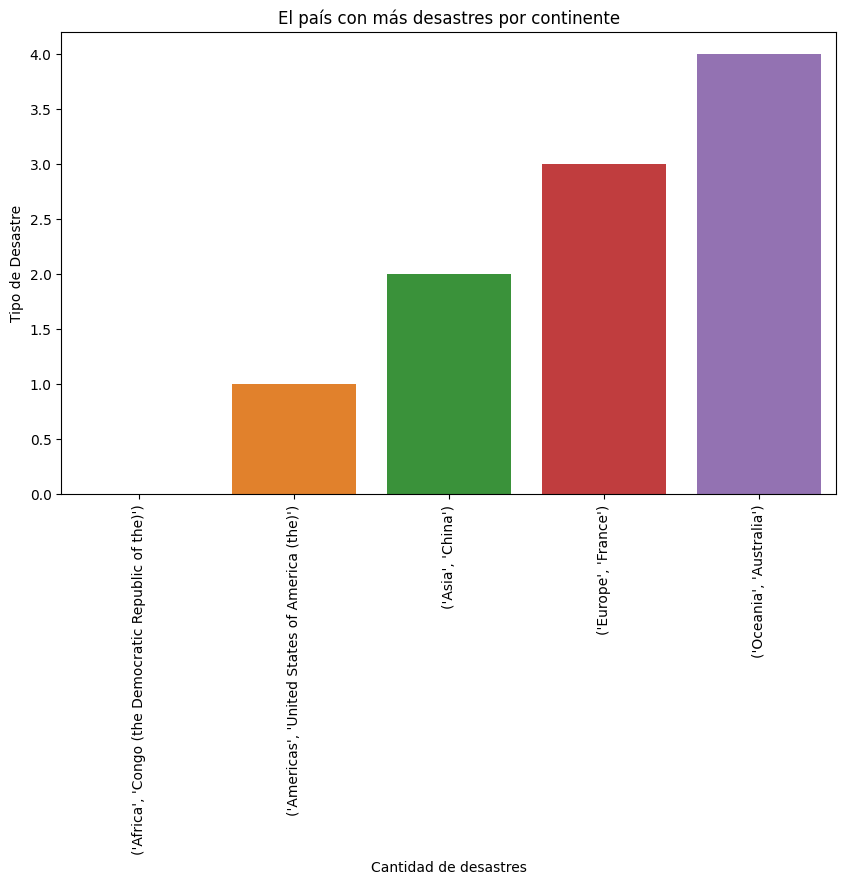

In [57]:
# Bar plot para el país con más desastres por continente
plt.figure(figsize=(10, 6))
sns.barplot(x=top_country_in_continent.values, y=top_country_in_continent.index)
plt.title('El país con más desastres por continente')
plt.xlabel('Cantidad de desastres')
plt.ylabel('Tipo de Desastre')
plt.xticks(rotation=90)
plt.show()
pass
# !!! Error: No aparece conteo para Congo

## Bar plot para top Disaster Subtypes

In [73]:
# Crear el scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Country', y='Count', hue='Disaster Subtype', style='Continent', data=top_countries_by_continent)
plt.title('Top 20 Countries Grouped by Continent')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title='Disaster Subtype')
plt.show()

ValueError: Could not interpret value `Disaster Subtype` for parameter `hue`

<Figure size 1000x800 with 0 Axes>

# Conclusiones

# Recomendaciones

# Guardar dataset en csv

In [ ]:
# df.to_csv('../../Data/02ParaLimpiar/02desastres_fillna.csv', index=False, sep=';', encoding='utf-8')

Dataset con valores rellenados y/o filas vacías borradas.